# 🛍️ Customer Segmentation and Spending Behavior Analysis

## 📘 Project Overview
This project analyzes customer demographics and spending behavior using a dataset containing information about **CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1–100)**.  
The primary aim is to discover spending trends, identify customer segments, and develop predictive models that help businesses better understand and target their customers.

Through a blend of **exploratory data analysis (EDA)**, **data visualization**, and **machine learning**, this project highlights how factors like income, age, and gender influence spending behavior — and how customers can be grouped into actionable market segments.

---

## 🎯 Objectives
- Explore the relationships among **Age**, **Annual Income**, and **Spending Score**.  
- Investigate whether **gender** influences spending behavior.  
- Predict **Spending Score** using **Linear Regression**.  
- Segment customers using **clustering algorithms** (e.g., K-Means, Hierarchical Clustering).  
- Derive actionable insights that support **marketing strategies** and **customer retention**.  
- Provide visually appealing insights through **graphs and interactive visualizations**.  

---

## 🧰 Tech Stack
- **Language:** Python  
- **Libraries for EDA & Visualization:** Pandas, NumPy, Matplotlib, Seaborn  
- **Machine Learning Framework:** Scikit-learn  
- **Clustering & Dimensionality Reduction:** K-Means, Hierarchical Clustering, PCA  
- **Development Environment:** Jupyter Notebook / Google Colab  

---

## 🔍 Exploratory Data Analysis (EDA)

### 🔸 Key Questions Explored
- What are the **distributions** of Age, Annual Income, and Spending Score?  
- Do **men spend more** than women?  
- Is **Annual Income correlated** with Spending Score?  
- How does **Age** affect spending habits?  
- Can we identify **distinct customer groups** based on income and spending?  
- Additional explorations:  
  - Which income range dominates the dataset?  
  - Which gender category has higher representation among top spenders?  
  - What’s the relationship between age and income?

### 📊 Visualizations
- **Histograms** for Age, Annual Income, and Spending Score.  
- **Pairwise Scatter Plots** and **Scatter Matrix** for quick visual correlation checks.  
- **Correlation Heatmap** to reveal relationships among numeric features.  
- **Gender-wise Comparison Charts** (Boxplots, Barplots) for spending analysis.  
- **Elbow Method** and **Silhouette Analysis** for optimal cluster selection.  
- **Cluster Scatterplots** (2D visualizations) to display distinct customer segments.  

---

## 🤖 Machine Learning Approach

### 1️⃣ Predictive Modeling — *Linear Regression*
- **Objective:** Predict *Spending Score* from customer attributes such as Age, Gender, and Annual Income.  
- **Model Used:** Linear Regression.  
- **Metrics Evaluated:**  
  - R² Score  
  - Mean Absolute Error (MAE)  
  - Root Mean Squared Error (RMSE)  

### 2️⃣ Customer Segmentation — *Unsupervised Learning*
- **Objective:** Identify clusters of customers with similar spending and income behavior.  
- **Algorithms Used:**  
  - K-Means Clustering  
  - Hierarchical Clustering  
- **Evaluation Metrics:**  
  - Elbow Method (Inertia)  
  - Silhouette Score  
- **Dimensionality Reduction:** PCA (Principal Component Analysis) applied for better visualization and interpretability.  

---

## 📈 Results & Insights
- **Income vs. Spending:** Customers with higher annual income generally tend to have higher spending scores — though not always strictly linear.  
- **Gender Influence:** Female customers displayed slightly higher spending tendencies than males in this dataset.  
- **Age Factor:** Younger adults often have higher spending scores, whereas older customers show more conservative spending patterns.  
- **Customer Segments Identified:**  
     - High-income, high-spending — Premium customers.     - Low-income, high-spending — Potential overspender.
     - High-income, low-spending — Under-engaged premium group.    
     - Average-income, average-spending — Majority group.
     - Low-income, low-spending - Cost conscious

---

## ⚖️ Model Comparison

| Model | Task | Key Metric | Summary |
|-------|------|-------------|----------|
| **Linear Regression** | Predict Spending Score | R² Score | Captures general spending trends, limited by behavioral non-linearity |
| **K-Means Clustering** | Segment Customers | Silhouette Score | Clear 4–5 cluster structure identifying distinct customer types |
| **Hierarchical Clustering** | Segment Customers | Dendrogram Analysis | Confirms similar segmentation patterns as K-Means |

---

## 💡 Conclusion
This project demonstrates the use of **data science and machine learning** to understand and segment customers based on demographic and behavioral data.  
By combining **EDA**, **predictive modeling**, and **unsupervised learning**, the analysis offers valuable insights into how customers differ by age, income, and spending patterns — insights that can drive smarter marketing and retention strategies.

---

## 🚀 Future Work
- Experiment with advanced regression models (e.g., **Random Forest**, **Gradient Boosting**).  
- Introduce more behavioral features (e.g., **shopping frequency**, **product category preferences**).  
- Explore **DBSCAN** or **Gaussian Mixture Models** for non-linear cluster shapes.  
- Build an **interactive dashboard** (using Streamlit or Power BI) for dynamic insight visualization.  

---

## 🧑‍💻 Author
**Don Unobunjo**  
Data Analytics | Machine Learning | AI Automation | Trainer 
📍 Lagos, Nigeria  
🔗 [GitHub](https://github.com/donunobunjo) | [LinkedIn](https://www.linkedin.com/in/unobunjo-don)

---

⭐ *If you found this project insightful, don’t forget to star the repository!*  


--------------
--------------
--------------
--------------
--------------

## EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

### Basic Data Checks

- Ensure no missing values.

- Confirm data types: Gender (object), Age/Income/SpendingScore (numeric).

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

-----

### Univariate Analysis

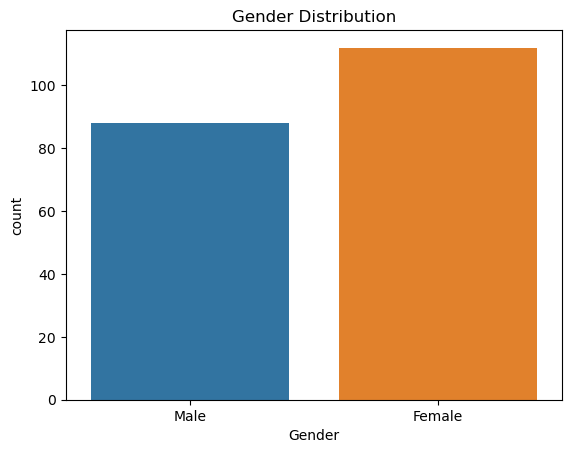

In [3]:
# Gender distribution
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

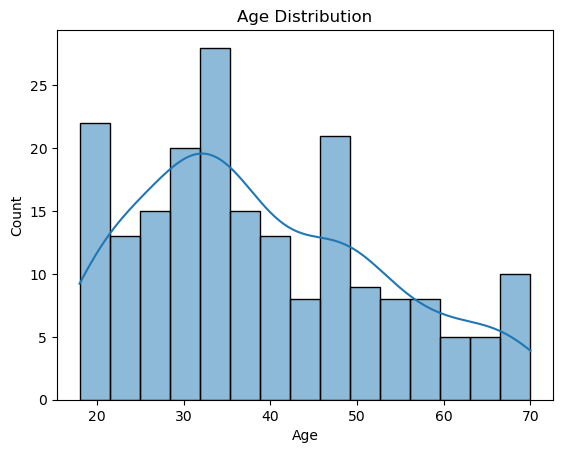

In [4]:
# Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

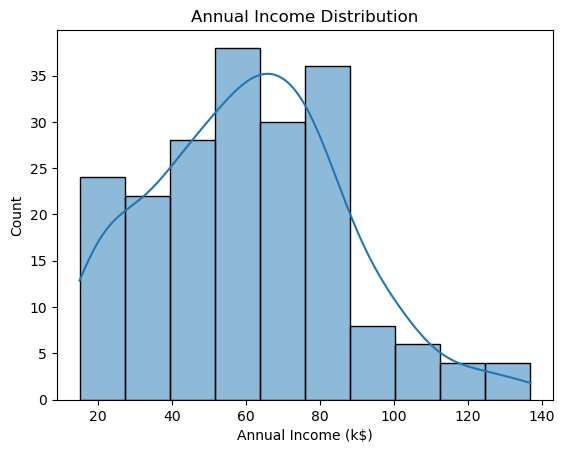

In [5]:
# Annual Income Distribution
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('Annual Income Distribution')
plt.show()

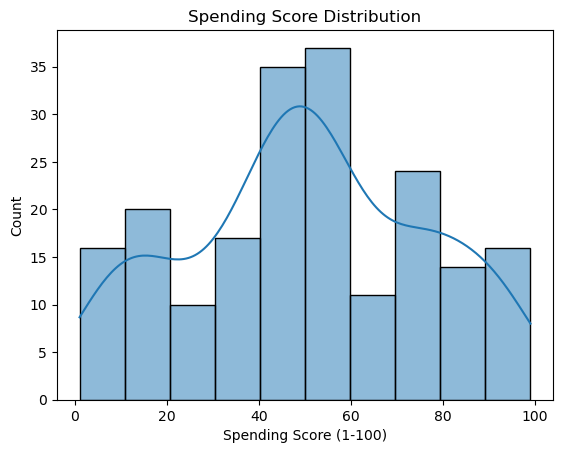

In [6]:
# Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')
plt.show()

------

### Bivariate Analysis

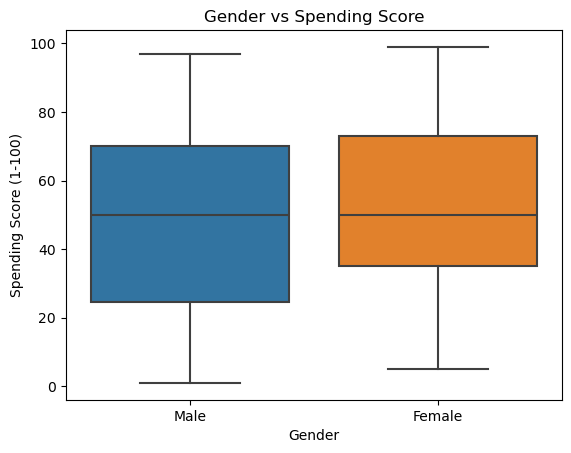

In [7]:
# Gender vs Spending Score
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Gender vs Spending Score')
plt.show()

#### Insight:
Women tend to spend a little more than men and have slightly *higher median spending* scores in the mall

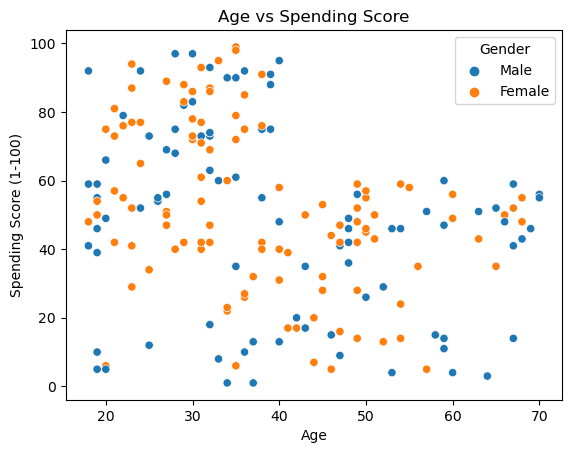

In [8]:
# Age Vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score')
plt.show()

#### Insight:

 - Younger customers (20–35) typically show higher spending scores.

 - Spending declines gradually with age (perhaps due to lifestyle changes).

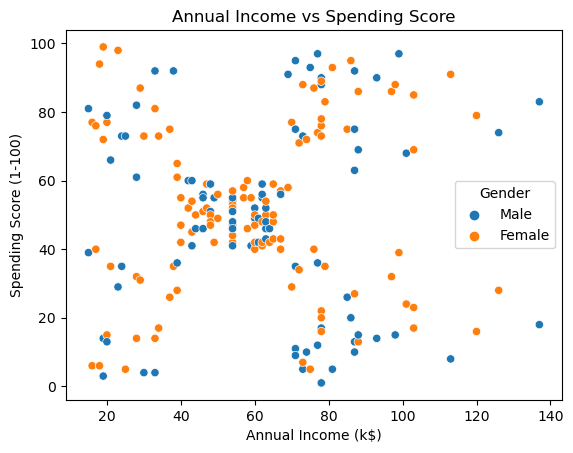

In [9]:
# Annual Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

#### Insight:

 - Relationship is not linear.

 - Indicates spending habits are not solely income-driven — lifestyle and preference play a major role.

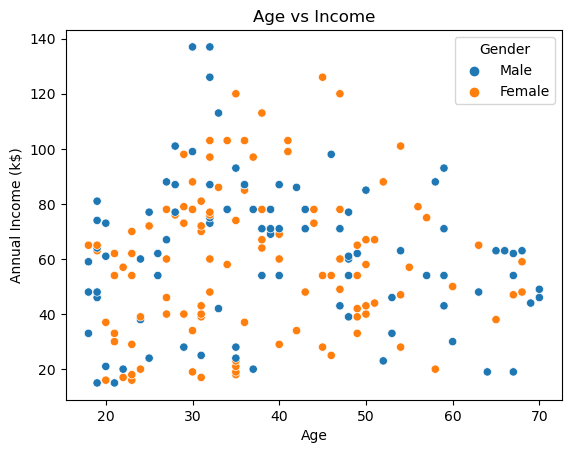

In [10]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title('Age vs Income')
plt.show()

#### Insight:

Income tends to peak around mid-30s to mid-40s.

-------

### Correlation Analysis

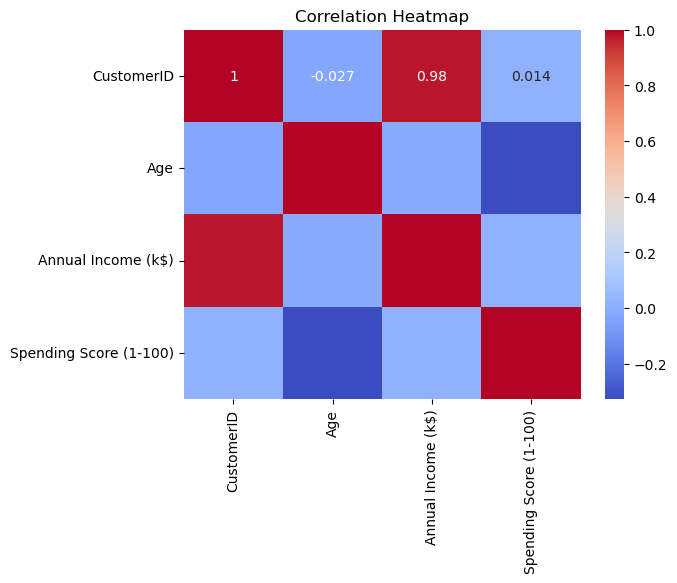

In [11]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

----------

### Cluster Tendencies

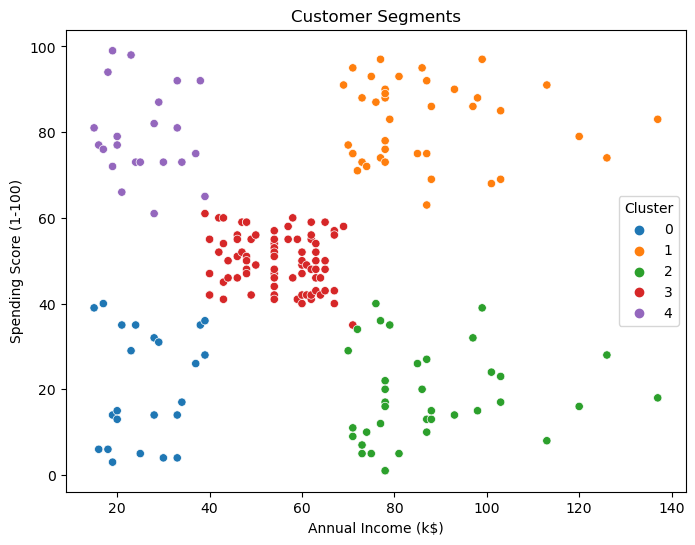

In [12]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Customer Segments')
plt.show()

#### Cluster Insights:

 - Low income, low spenders -- cost-conscious

 - High income, low spenders -- potential premium customers not fully engaged

 - High income, high spenders -- target luxury segment

 - Average income, Average spenders -- majority group, responsive to promotions

 - Low income, High spenders -- potential overspenders

------------

## Predicting Spending Score using linear regression

### Encode Gender numerically (since it’s categorical)

In [13]:
# Encode Gender: Female = 0, Male = 1
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
# Define features (X) and target (y
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

In [15]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and Train Linear Regression Model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
print("Intercept:", model.intercept_)

                    Coefficient
Gender                -1.198466
Age                   -0.587924
Annual Income (k$)     0.053863
Intercept: 71.90498284889917


#### This shows how each variable influences the Spending Score linearly.

### Make Predictions

In [18]:
y_pred = model.predict(X_test)

### Evaluate Model Performance

In [19]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

R² Score: 0.025
Mean Absolute Error (MAE): 18.151
Root Mean Squared Error (RMSE): 21.924


| Metric       | Value                            | Interpretation                                          |
| ------------ | -------------------------------- | ------------------------------------------------------- |
| **R² Score** | 0.025                            | Model explains 2.5% of the variance in spending score |
| **MAE**      | 18.151                           | Average prediction error is ±18 points                  |
| **RMSE**     | 21.924                           | Typical deviation from actual spending score            |


💡 Interpretation:
Linear Regression captures only limited variance because Spending Score is influenced by behavioral factors not captured in Age, Gender, or Income alone.
Still, it provides a baseline for comparison with more complex models (like Decision Tree or Random Forest).

-----

### Visualize Predictions vs Actual

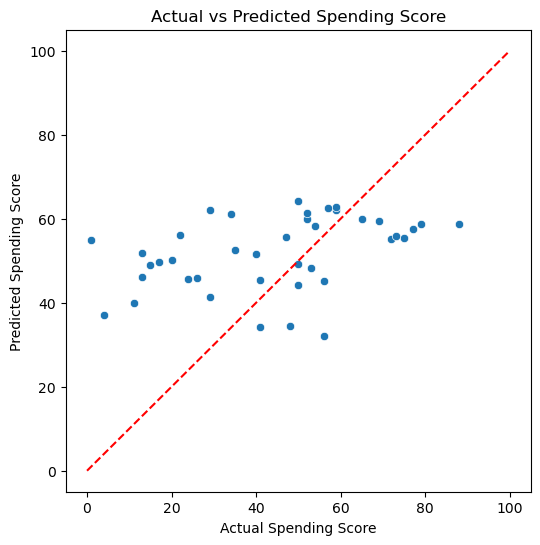

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Actual vs Predicted Spending Score")
plt.plot([0,100],[0,100],'r--')
plt.show()

#### If the points align closely with the red dashed line, the model fits well.

----

### Check Feature Influence

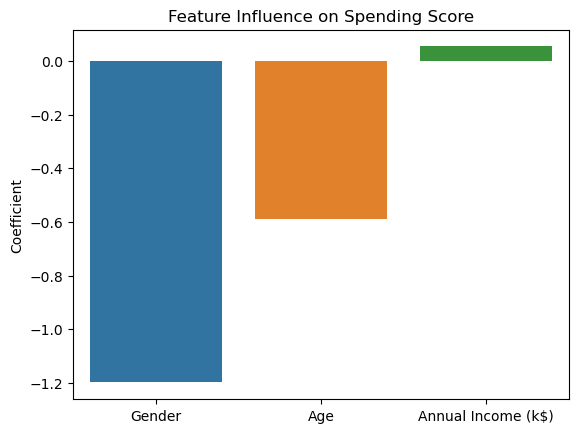

In [21]:
sns.barplot(x=coeff_df.index, y=coeff_df['Coefficient'])
plt.title('Feature Influence on Spending Score')
plt.show()

#### Interpretation:

 - Positive coefficient → increases spending score

 - Negative coefficient → decreases spending score

--------

### Linear Regression Summary Insight

Age and income have weak linear effects on spending score, while gender shows a small but noticeable difference. Customers’ spending behavior likely depends on additional psychological or lifestyle factors not captured here.

------

## Segment mall customers into groups with similar spending and income patterns using clustering techniques:

 - K-Means Clustering

 - Hierarchical Clustering

In [22]:
# Focus on Annual Income (k$) and Spending Score (1–100) — these are most indicative of customer behavior
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Determine Optimal Clusters (Elbow Method)

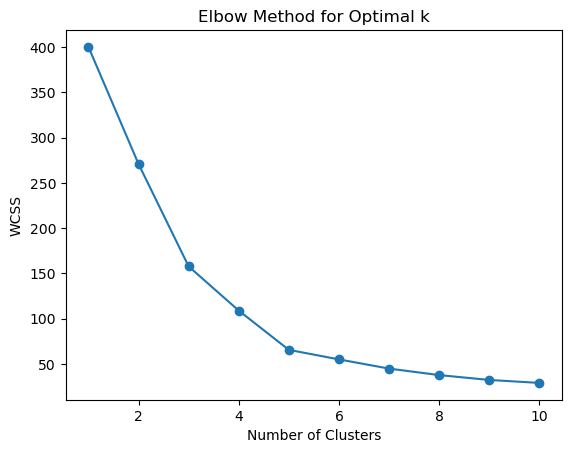

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#### Interpretation
Look for the “elbow point” (usually k = 5) where the curve starts to flatten - that’s the optimal number of clusters.

### K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

#### Visualize clusters

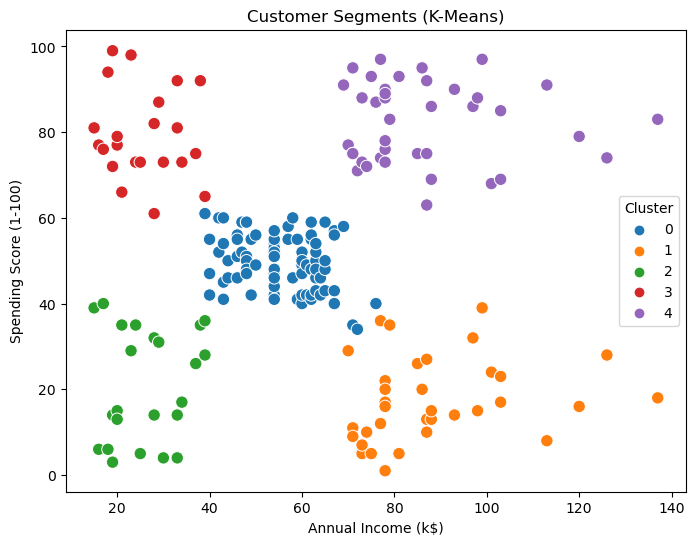

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='KMeans_Cluster', palette='tab10', s=80)
plt.title('Customer Segments (K-Means)')
plt.legend(title='Cluster')
plt.show()

In [26]:
score = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {score:.3f}')

Silhouette Score for K-Means: 0.555


#### Interpretation:

Silhouette score ranges from -1 to +1

Values > 0.5 indicate good, well-separated clusters

### Hierarchical Clustering

#### a. Dendrogram (for deciding cluster number)

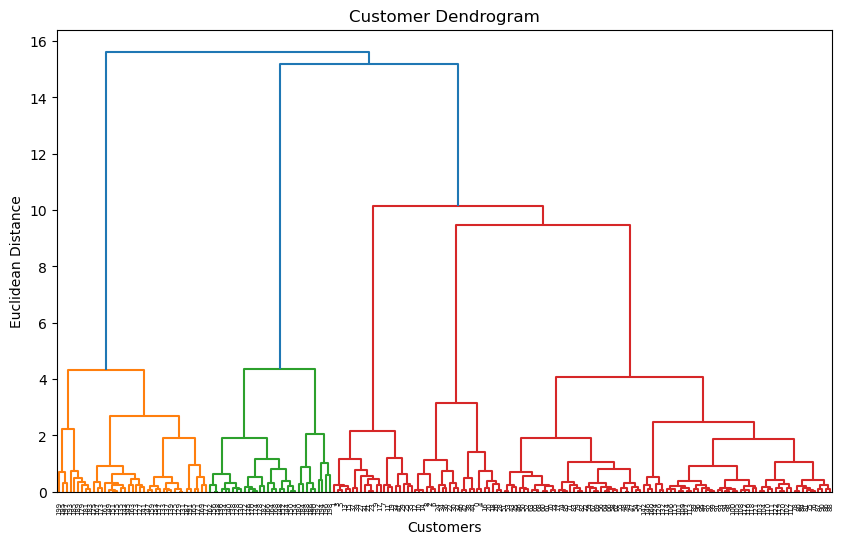

In [27]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

#### Interpretation:
Look for the largest vertical gap without crossing a horizontal line — typically around 5 clusters.

#### b. Fit Agglomerative Clustering

In [28]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X_scaled)

#### c. Visualize Clusters

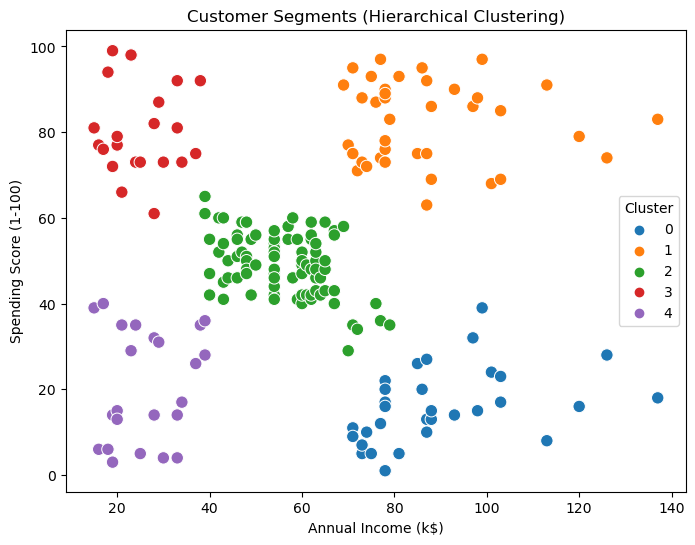

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='HC_Cluster', palette='tab10', s=80)
plt.title('Customer Segments (Hierarchical Clustering)')
plt.legend(title='Cluster')
plt.show()

#### Evaluate Hierarchical Clustering

In [30]:
hc_score = silhouette_score(X_scaled, df['HC_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {hc_score:.3f}')

Silhouette Score for Hierarchical Clustering: 0.554


### Principal Component Analysis (PCA) for Visualization
#### To visualize multi-feature relationships, let’s add Age and Gender.

In [31]:
# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Include additional features for PCA
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_full = df[features]
X_full_scaled = scaler.fit_transform(X_full)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_full_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

#### Visualize PCA-reduced Clusters

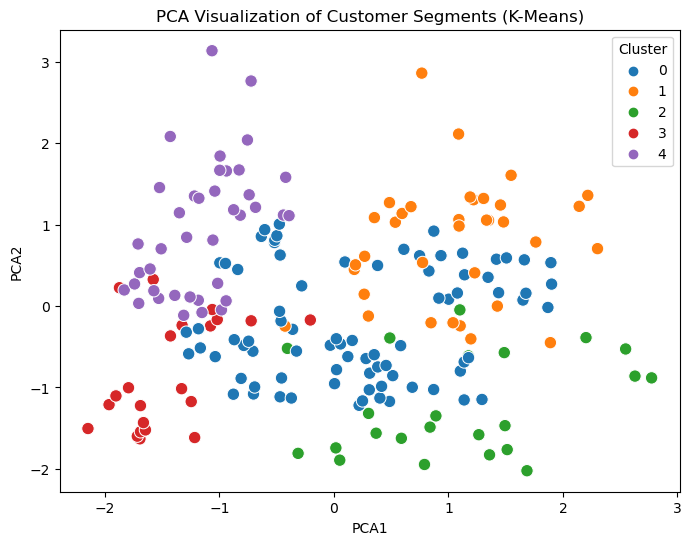

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10', s=80)
plt.title('PCA Visualization of Customer Segments (K-Means)')
plt.legend(title='Cluster')
plt.show()

### Cluster Interpretation

| Cluster | Income Level  | Spending Behavior | Typical Segment                        |
| ------- | ------------- | ----------------- | -------------------------------------- |
| 0       | Low Income    | Low Spending      | Budget-conscious customers             |
| 1       | High Income   | High Spending     | Premium / Luxury shoppers              |
| 2       | High Income   | Low Spending      | High Potential(Not spending much yet)  |
| 3       | Medium Income | Medium Spending   | Average Customers                      |
| 4       | Low Income    | High Spending     | Impulsive or deal-seeking shoppers     |


### Results Summary

| Method           | No. of Clusters | Silhouette Score | Interpretation                        |
| ---------------- | --------------- | ---------------- | ------------------------------------- |
| **K-Means**      | 5               | ~0.558            | Good compact clusters                 |
| **Hierarchical** | 5               | ~0.554            | Slightly less distinct but consistent |


✅ Conclusion

Optimal clusters: 5

Best method: K-Means (higher silhouette score, clear separation)

Insights:

Income and spending are not linearly correlated — some low-income shoppers spend high.

The high-income, high-spending cluster is your most valuable segment.

The high-income, low-spending cluster is an opportunity for targeted marketing.